<a href="https://colab.research.google.com/github/siddheshsabnis/ALL_Projects_SEM/blob/main/Uber_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import necesssary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

import os

In [ ]:
#Read csv file and Display first 5 rows
df=pd.read_csv("My Uber Drives - 2016.csv")
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
#Display last 5 rows
df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [ ]:
#Display the data types of columns in the DataFrame
print(df.shape)
df.dtypes

(1156, 7)


START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [ ]:
#Calculate and display the count of missing values in each column
df.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [ ]:
#Filter and display rows from the DataFrame where the 'END_DATE*' column contains missing values.
df[df['END_DATE*'].isna()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [ ]:
#Remove rows from the DataFrame where the 'END_DATE*' column contains missing values.
df.drop(df[df['END_DATE*'].isna()].index,axis=0,inplace=True)

In [ ]:
#Calculate and display the count of missing values in each column of the DataFrame df.
df.isna().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [ ]:
#Display a summary of the DataFrame's information, including data types and non-null counts for each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
#Remove the 'PURPOSE*' column from the DataFrame and display the first 2 rows of the modified DataFrame.
df.drop(['PURPOSE*'],axis=1,inplace=True)
df.head(2)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0


In [ ]:
#Filter and display rows in the DataFrame that are duplicates, based on all columns.
df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9


In [ ]:
#Remove the initial set of duplicate rows from the DataFrame and then display any remaining duplicates in the DataFrame.
df.drop(df[df.duplicated()].index,axis=0,inplace=True)
df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*


In [ ]:
 #Parse and convert the 'START_DATE*' and 'END_DATE*' columns from string to datetime format using the specified date and time format.
df['START_DATE*']=pd.to_datetime(df['START_DATE*'],format='%m/%d/%Y %H:%M')
df['END_DATE*']=pd.to_datetime(df['END_DATE*'],format='%m/%d/%Y %H:%M')

In [ ]:
#Retrieve and display the unique categories present in the 'CATEGORY*' column of the DataFrame.
df['CATEGORY*'].unique()

array(['Business', 'Personal'], dtype=object)

In [ ]:
#Group the data by 'CATEGORY*' column and calculate the total miles ('MILES*') for each category, presenting the results in a new DataFrame with the column name 'tot_miles'.
df[['CATEGORY*','MILES*']].groupby(['CATEGORY*']).agg(tot_miles=('MILES*','sum'))

,tot_miles
CATEGORY*,
Business,11477.1
Personal,717.7


Text(0.5, 1.0, 'Total Miles per Category')

<Figure size 640x480 with 0 Axes>

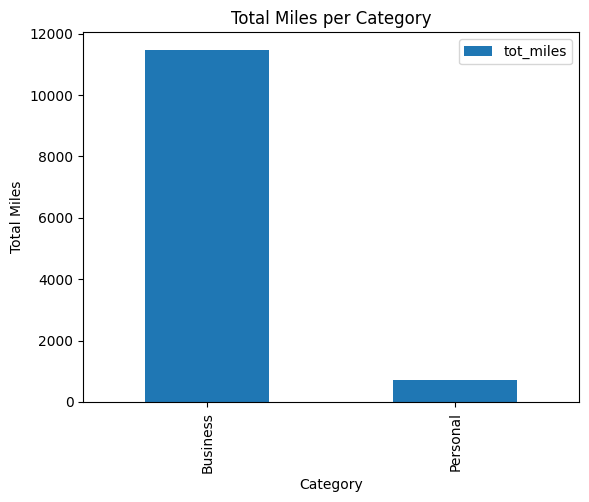

In [ ]:
#Generate a bar chart displaying the total miles per category, with appropriate X-axis label, Y-axis label, and chart title.
plt.figure()
df[['CATEGORY*','MILES*']].groupby(['CATEGORY*']).agg(tot_miles=('MILES*','sum')).plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Total Miles')
plt.title('Total Miles per Category')


In [ ]:
 #Determine and display the number of unique starting locations in the 'START*' column of the DataFrame.
len(df['START*'].unique())

177

In [ ]:
#Display the top 10 most common starting locations along with their respective frequency counts in the 'START*' column of the DataFrame.
df['START*'].value_counts(ascending=False)[:10]

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: START*, dtype: int64

<Axes: title={'center': 'Top 10 Pickup Places'}, xlabel='Pickup Count', ylabel='Places'>

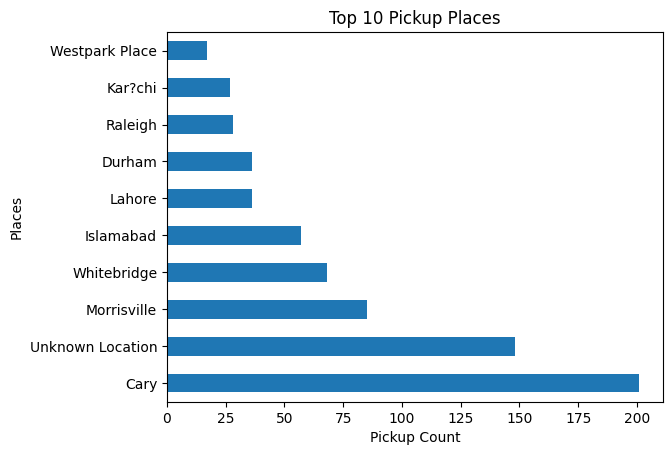

In [ ]:
 #Generate a horizontal bar chart displaying the top 10 most common starting locations along with their pickup counts, with appropriate axis labels and chart title.
df['START*'].value_counts(ascending=False)[:10].plot(kind='barh',ylabel='Places',xlabel='Pickup Count',title='Top 10 Pickup Places')

In [ ]:
#Determine and display the number of unique stopping locations in the 'STOP*' column of the DataFrame.
len(df['STOP*'].unique())

188

<Axes: title={'center': 'Top 10 Drop Places'}, xlabel='Pickup Count', ylabel='Places'>

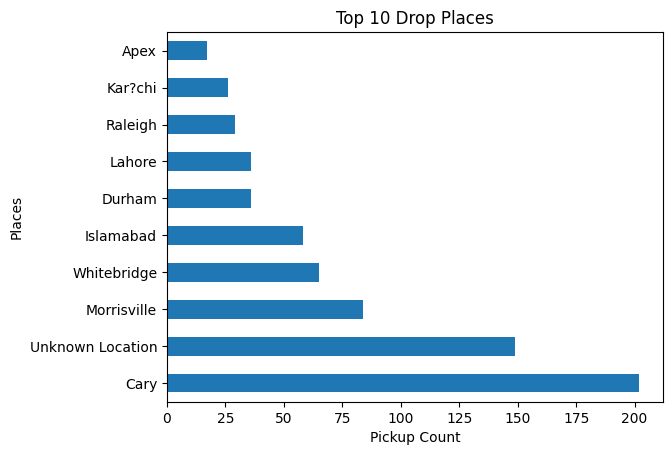

In [ ]:
#Generate a horizontal bar chart displaying the top 10 most common stopping locations along with their drop counts, with appropriate axis labels and chart title.
df['STOP*'].value_counts(ascending=False)[:10].plot(kind='barh',ylabel='Places',xlabel='Pickup Count',title='Top 10 Drop Places')

In [ ]:
 #Count and display the number of trips where the starting location is labeled as 'Unknown Location' in the DataFrame.
df[df['START*']=='Unknown Location']['START*'].value_counts()

Unknown Location    148
Name: START*, dtype: int64

In [ ]:
# Count the number of occurrences of 'Unknown Location' in the 'STOP*' column
df[df['STOP*']=='Unknown Location']['STOP*'].value_counts()

Unknown Location    149
Name: STOP*, dtype: int64

<Axes: xlabel='MILES*', ylabel='Count'>

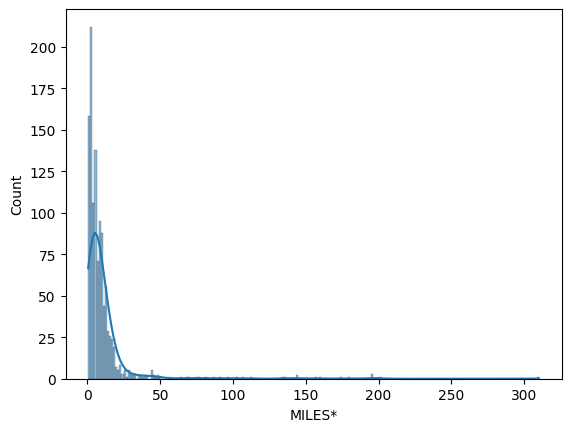

In [ ]:
# Plot a histogram of miles driven
sns.histplot(df['MILES*'],kde=True)

In [ ]:
# Print the descriptive statistics of the DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MILES*,1154.0,10.567418,21.588452,0.5,2.9,6.0,10.4,310.3


In [ ]:
#Print first 5 rows
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7


In [ ]:
#This code groups the DataFrame df by the columns START* and STOP*, and then prints the MILES* column for each group.
df.groupby(['START*','STOP*'])['MILES*'].apply(print)

910    2.2
Name: (Agnew, Agnew), dtype: float64
906    4.3
Name: (Agnew, Cory), dtype: float64
908    2.2
911    2.4
Name: (Agnew, Renaissance), dtype: float64
879    15.2
Name: (Almond, Bryson City), dtype: float64
646    1.0
825    3.3
Name: (Apex, Apex), dtype: float64
58      5.5
60      5.7
80      5.7
173     5.6
410     7.2
565     5.5
616     4.6
647     6.0
826     5.3
978     5.4
1014    5.3
1033    8.8
1045    4.7
Name: (Apex, Cary), dtype: float64
855    2.2
Name: (Apex, Eagle Rock), dtype: float64
1001    9.0
Name: (Apex, Holly Springs), dtype: float64
469    17.0
Name: (Arabi, Metairie), dtype: float64
621    4.9
Name: (Arlington, Washington), dtype: float64
613    1.3
Name: (Arlington Park at Amberly, Lexington Park at Amberly), dtype: float64
881    195.9
Name: (Asheville, Mebane), dtype: float64
871    91.8
Name: (Asheville, Topton), dtype: float64
232    136.0
Name: (Austin, Katy), dtype: float64
547     8.3
548     3.2
551     4.5
556    13.0
557     4.4
Name: (Banne

START*         STOP*             
Agnew          Agnew                 None
               Cory                  None
               Renaissance           None
Almond         Bryson City           None
Apex           Apex                  None
                                     ... 
Whitebridge    Wayne Ridge           None
               Westpark Place        None
               Whitebridge           None
               Williamsburg Manor    None
Winston Salem  Asheville             None
Name: MILES*, Length: 363, dtype: object

In [ ]:
#This code calculates the sum of the MILES* column for each group in the DataFrame df, sorted in descending order, and then selects the rows at indices 1 to 10 (inclusive).
df.groupby(['START*','STOP*'])['MILES*'].sum().sort_values(ascending=False)[1:11]

START*            STOP*           
Morrisville       Cary                395.7
Cary              Durham              390.0
                  Morrisville         380.0
Raleigh           Cary                365.7
Cary              Raleigh             336.5
Durham            Cary                324.5
Latta             Jacksonville        310.3
Islamabad         Unknown Location    267.0
Cary              Cary                255.9
Unknown Location  Islamabad           243.8
Name: MILES*, dtype: float64

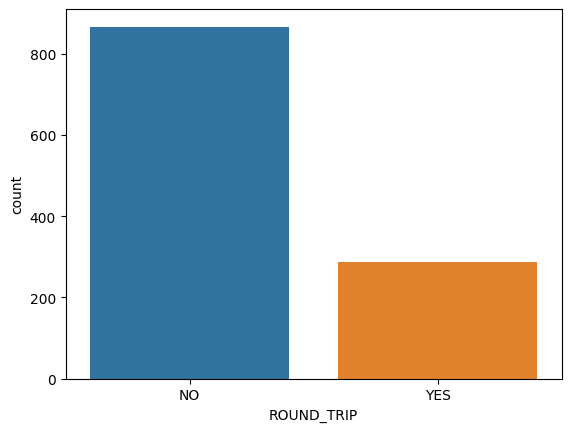

In [ ]:
#This function determines whether a trip is a round trip by checking if the START* and STOP* values are identical.
def is_roundtrip(row):
    if row['START*'] == row['STOP*']:
        return 'YES'
    else:
        return 'NO'


df['ROUND_TRIP'] = df.apply(is_roundtrip, axis=1)


sns.countplot(x='ROUND_TRIP', data=df, order=df['ROUND_TRIP'].value_counts().index)
plt.show()

In [ ]:
#This code counts the occurrences of each value in the ROUND_TRIP column of the DataFrame df.
df['ROUND_TRIP'].value_counts()

NO     866
YES    288
Name: ROUND_TRIP, dtype: int64

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


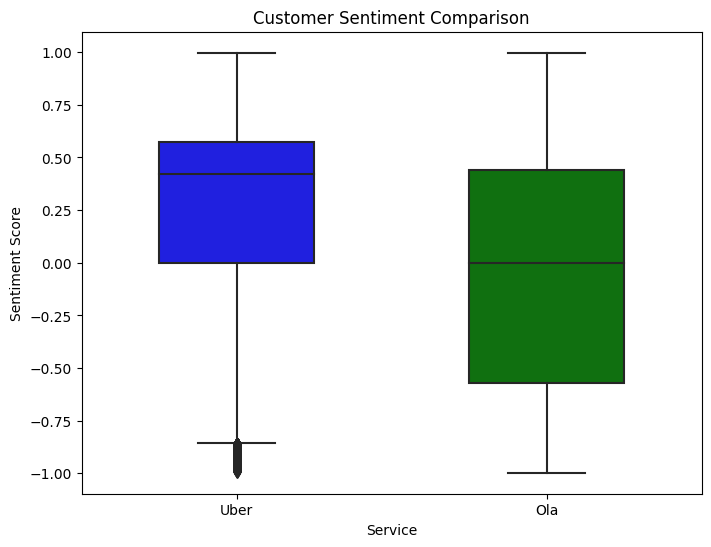

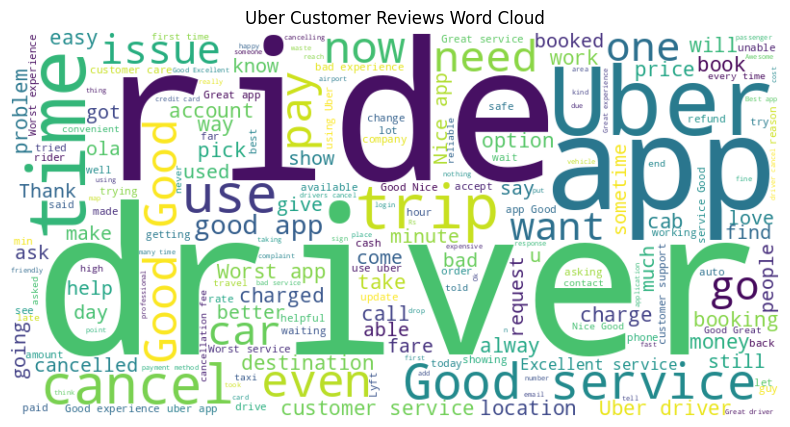

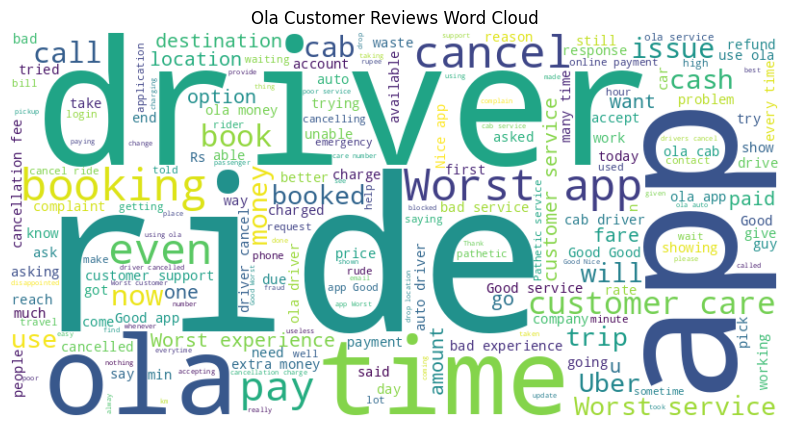

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK data
nltk.download('punkt')
nltk.download('vader_lexicon')

# Load datasets
uber_reviews = pd.read_csv('Uber Customer Reviews.csv')
ola_reviews = pd.read_csv('Ola Customer Reviews.csv')

# Handle missing values by dropping NaN values in 'review_description' column
uber_reviews.dropna(subset=['review_description'], inplace=True)
ola_reviews.dropna(subset=['review_description'], inplace=True)

# Sentiment Analysis
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    sentiment = sid.polarity_scores(text)
    return sentiment['compound']

# Perform Sentiment Analysis on review descriptions
uber_reviews['Sentiment'] = uber_reviews['review_description'].apply(analyze_sentiment)
ola_reviews['Sentiment'] = ola_reviews['review_description'].apply(analyze_sentiment)

# Word Clouds
uber_text = ' '.join(uber_reviews['review_description'])
wordcloud_uber = WordCloud(width=800, height=400, background_color='white').generate(uber_text)

ola_text = ' '.join(ola_reviews['review_description'])
wordcloud_ola = WordCloud(width=800, height=400, background_color='white').generate(ola_text)

# Visualizations
# Sentiment Comparison
plt.figure(figsize=(8, 6))
sns.boxplot(data=[uber_reviews['Sentiment'], ola_reviews['Sentiment']],
            width=0.5, palette=['blue', 'green'])
plt.xticks(ticks=[0, 1], labels=['Uber', 'Ola'])
plt.xlabel('Service')
plt.ylabel('Sentiment Score')
plt.title('Customer Sentiment Comparison')
plt.show()

# Word Clouds
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_uber, interpolation='bilinear')
plt.axis('off')
plt.title('Uber Customer Reviews Word Cloud')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ola, interpolation='bilinear')
plt.axis('off')
plt.title('Ola Customer Reviews Word Cloud')
plt.show()


Number of Positive Reviews: 11085
Number of Negative Reviews: 4869
Number of Neutral Reviews: 4046


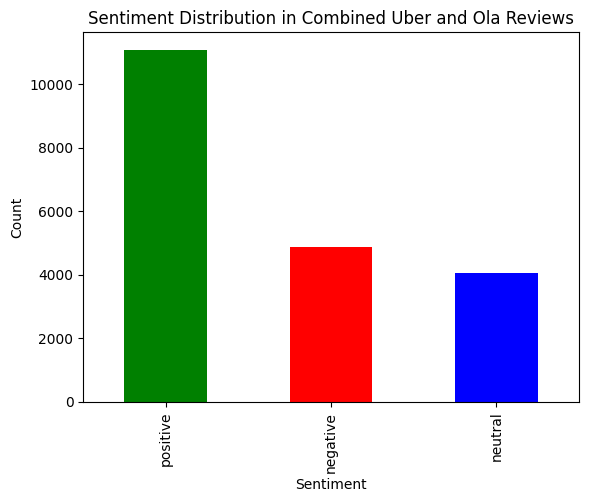

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load Uber and Ola datasets
uber_df = pd.read_csv('Uber Customer Reviews.csv', dtype=str).sample(n=10000)
ola_df = pd.read_csv('Ola Customer Reviews.csv', dtype=str).sample(n=10000)

# Combine the two datasets into one
combined_df = pd.concat([uber_df[['review_description']],
                        ola_df[['review_description']]],
                        ignore_index=True)

# Drop rows with missing values in 'review_description'
combined_df.dropna(subset=['review_description'], inplace=True)

# Function to assign sentiment labels
def get_sentiment(text):
    analysis = TextBlob(text)
    # Assign sentiment labels: 'positive', 'negative', or 'neutral'
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the 'review_description' column
combined_df['sentiment'] = combined_df['review_description'].apply(get_sentiment)

# Count the number of reviews for each sentiment
sentiment_counts = combined_df['sentiment'].value_counts()

# Print the counts for each sentiment
print("Number of Positive Reviews:", sentiment_counts['positive'])
print("Number of Negative Reviews:", sentiment_counts['negative'])
print("Number of Neutral Reviews:", sentiment_counts['neutral'])

# Visualize sentiment distribution
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution in Combined Uber and Ola Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from textblob import TextBlob

# Load Ola and Uber datasets
ola_df = pd.read_csv('Ola Customer Reviews.csv', dtype=str).sample(n=100000) # Adjust the sample size as needed
uber_df = pd.read_csv('Uber Customer Reviews.csv', dtype=str).sample(n=100000)  # Adjust the sample size as needed

# Combine the two datasets into one
combined_df = pd.concat([ola_df[['review_description']], uber_df[['review_description']]], ignore_index=True)

# Drop rows with missing values in 'review_description'
combined_df.dropna(subset=['review_description'], inplace=True)

# Use TextBlob for sentiment analysis
combined_df['predicted_sentiment'] = combined_df['review_description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify as positive, negative, or neutral based on sentiment polarity
combined_df['predicted_sentiment_label'] = combined_df['predicted_sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Use the predicted sentiment labels as the target variable
y = combined_df['predicted_sentiment_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_df['review_description'], y, test_size=0.2, random_state=42)

# Vectorize the reviews using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=50)
X_train_vectorized = tfidf_vectorizer.fit_transform(X_train)
X_test_vectorized = tfidf_vectorizer.transform(X_test)

# Build and train the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
random_forest.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test_vectorized)

# Print classification report with precision, recall, and f1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.65      0.69      9703
     neutral       0.49      0.73      0.58      8203
    positive       0.84      0.73      0.78     22092

    accuracy                           0.71     39998
   macro avg       0.69      0.70      0.68     39998
weighted avg       0.74      0.71      0.72     39998

